Copyright 2018 The TensorFlow Authors.

In [ ]:

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 1_Tensorflow: Celsius to Fahrenheit

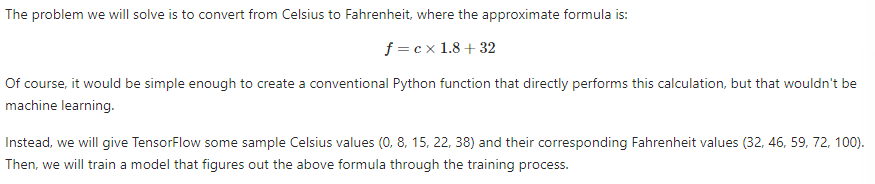

In [105]:
#Import libraries
import tensorflow as tf 
import numpy as np
import logging

In [106]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#### Set up Training Data

In [107]:
#Dataset for training
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


#### Create Model

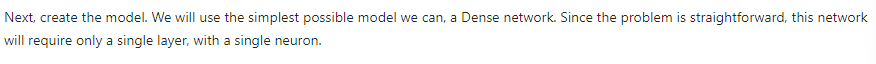

##### Build layer

In [108]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

- input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

- units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

##### Assemble into model

In [109]:
model = tf.keras.Sequential([l0]) 
#The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

You will often see the layers defined inside the model definition, rather than beforehand:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

#### Compile the model, with loss and optimizer functions

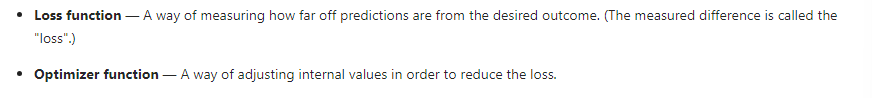

In [110]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

#### Train the model

In [111]:
history = model.fit(celsius_q, fahrenheit_a, epochs=600, verbose=False)
print("Finished training the model")

Finished training the model


celsius_q = the input
fahrenheit_a = the output
epochs = how many iterations the cycle should run
verbose = how much the output produces

#### Display training statistics

The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

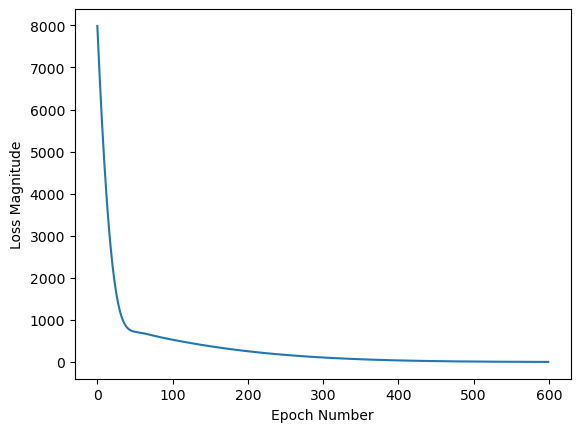

In [112]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

The model improves very quickly with increase in epoch until about 200-300, where there is slow steady improvement.

#### Use the model to predict values

In [113]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 43ms/step
[[211.5057]]


In [114]:
print(100*1.8+32)

212.0


Our model was pretty close in predicting the Fahrenheit value.

To review: 
- We created a model with a Dense layer
- We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value.

In [115]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8138472]], dtype=float32), array([30.120987], dtype=float32)]


We have 1.8 and 29. Pretty close to 1.8 and 32.

#### Further experiment with more layers

In [116]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 46ms/step
[[211.74744]]
1/1 [==============================] - 0s 26ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.2774045 ,  0.17697276,  1.0136528 ,  0.14689225]],
      dtype=float32), array([ 2.3385112 , -0.72256434,  4.043028  , -2.7991743 ], dtype=float32)]
These are the l1 variables: [array([[ 0.32531825, -0.47822317,  0.3806835 ,  1.4119054 ],
       [-0.67734826,  0.33546034, -1.0128528 , -0.5295682 ],
       [ 1.6717277 , -1.0462086 ,  0.39978737,  1.511297  ],
       [-1.1641824 ,  0.40799645, -1.5720303 , -0.4873038 ]],
      dtype=float32), array([ 3.0966322, -0.7318463,  1.573368 ,  3.5168455], dtype=float32)]
These are the l2 variables: [array([[0.62417597],
       [0.14989038],
       [0.3658577 ],
       [1.1690394 ]], dtype=float32), array([3.578852], dtype=float32)]
